In [59]:
import numpy as np

In [60]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [61]:
import matplotlib.pyplot as plt

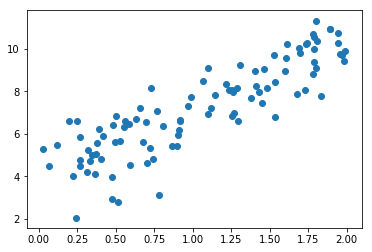

In [62]:
plt.scatter(X, y)
plt.show()

In [63]:
X_b = np.c_[np.ones((100, 1)), X]# add x0 = 1 to each instance

In [64]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [65]:
theta_best

array([[ 3.88564393],
       [ 3.17678411]])

In [66]:
X_new = np.array([[0], [2]])

In [67]:
X_new

array([[0],
       [2]])

In [68]:
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[  3.88564393],
       [ 10.23921216]])

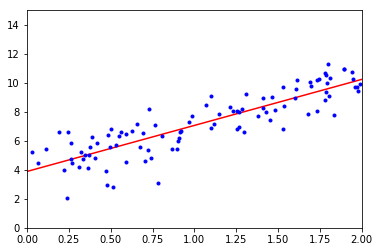

In [69]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [70]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([ 3.88564393]), array([[ 3.17678411]]))

In [71]:
lin_reg.predict(X_new)

array([[  3.88564393],
       [ 10.23921216]])

In [72]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1) # random initialization

for iteration in range(n_iterations):
    gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [73]:
theta

array([[ 3.88564393],
       [ 3.17678411]])

In [74]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1) # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index + 1]
        yi = y[random_index:random_index + 1]
        gradients = 2 / m * xi.T.dot(xi.dot(theta) - yi)
        theta = theta - learning_schedule(epoch * m + i) * gradients

In [75]:
theta

array([[ 3.19569842],
       [ 1.93074586]])

In [76]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=50, n_iter=None, penalty=None,
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [77]:
sgd_reg.intercept_, sgd_reg.coef_

(array([ 3.91485182]), array([ 3.2125917]))

In [78]:
# Polynomial regression

In [79]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

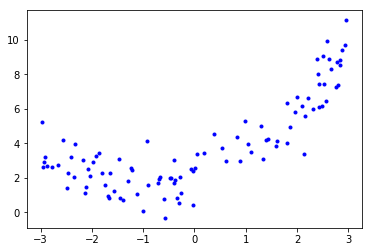

In [80]:
plt.plot(X, y, "b.")
plt.show()

In [81]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = poly_features.fit_transform(X)
X[0]

array([ 1.59431576])

In [82]:
X_poly[0]

array([ 1.59431576,  2.54184275])

In [83]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([ 2.14879886]), array([[ 0.96229181,  0.48009837]]))

In [84]:
# Learning curves

In [85]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

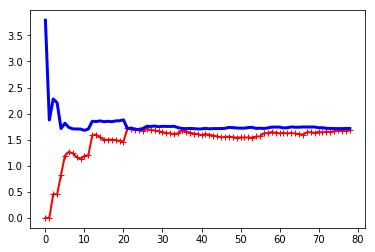

In [86]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

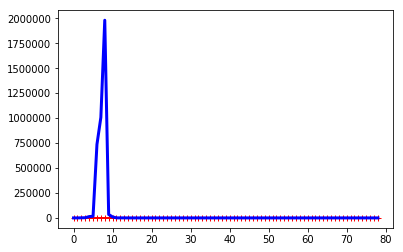

In [101]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

polynomial_regression = Pipeline((
    ("poly_features", PolynomialFeatures(degree = 10, include_bias = False)),
    ("sgd_reg", LinearRegression())
    ))

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler()),
    ])

plot_learning_curves(polynomial_regression, X, y)

In [88]:
# Ridge regression

In [89]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha = 1, solver = "cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[ 5.44150691]])

In [90]:
sgd_reg = SGDRegressor(penalty="l2", max_iter = 5, tol = None)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([ 4.5316591])

In [91]:
# Lasso regression

In [92]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha = 0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([ 5.40530361])

In [93]:
# Elastic net

In [94]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha = 0.1, l1_ratio = 0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([ 5.40458376])

In [95]:
# Early stopping

In [96]:
from sklearn.base import clone

In [103]:
X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

In [105]:
sgd_reg = SGDRegressor(max_iter = 1, warm_start = True, penalty = None, learning_rate = "constant", eta0 = 0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None

for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train) # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error =mean_squared_error(y_val_predict, y_val)
    if (val_error < minimum_val_error):
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

In [106]:
# Logistic regression

In [107]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names']

In [111]:
X = iris["data"][:, 3:] # petal width

In [113]:
y = (iris["target"] == 2).astype(np.int) # 1 if Iris-Virginica, else 0

In [114]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

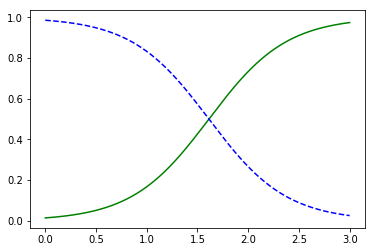

In [116]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label = "Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label = "Not Iris-Virginica")

In [117]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

In [118]:
# Softmax regression

In [119]:
X = iris["data"][:, (2, 3)] # petal length, petal width
y = iris["target"]

In [121]:
softmax_reg = LogisticRegression(multi_class = "multinomial", solver = "lbfgs", C = 10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [122]:
softmax_reg.predict([[5, 2]])

array([2])

In [123]:
softmax_reg.predict_proba([[5, 2]])

array([[  6.33134077e-07,   5.75276067e-02,   9.42471760e-01]])